<a href="https://colab.research.google.com/github/szh141/mlproject/blob/main/Rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@iabbasali/australia-rain-prediction-using-machine-learning-614e9d2212eb

Logistic Regression
Decision Tree Classifier
Random Forest Classifier
XGBoost
Support Vector Classifier

compare five classifiers using confusion matrix

data clean up tips

In [16]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab images/Data/weatherAUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Oh, man! There are plenty of missing values in each of the columns.

Let’s not waste any time tweaking each and every column. Let’s just drop the records containing null values in it.

In [21]:
null_values_dropped_df = df.dropna()
null_values_dropped_df.shape # (56420, 23)

(56420, 23)

In [18]:
null_values_dropped_df = null_values_dropped_df.replace({'RainTomorrow':{'Yes':1, 'No':0}})

In [38]:
numerical_col = []
categorical_col = []
for col in null_values_dropped_df.columns:
    if null_values_dropped_df[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numerical_col.append(col)

In [39]:
numerical_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

<Axes: >

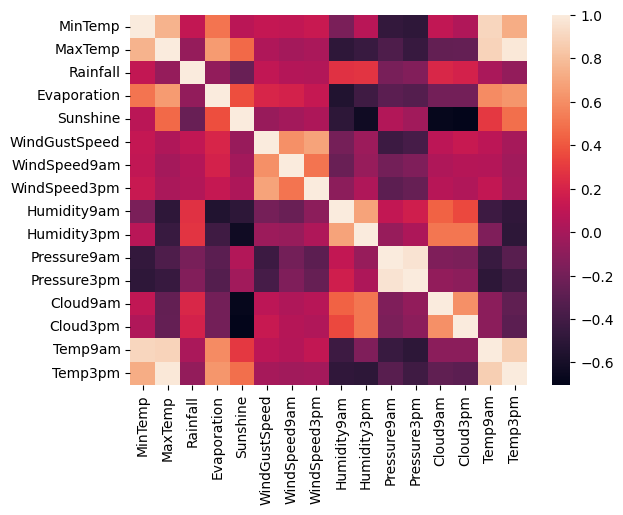

In [41]:
null_values_dropped_df[numerical_col].corr()
import seaborn as sns
sns.heatmap(null_values_dropped_df[numerical_col].corr())